In [1]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns
from sail.data import RemoteDataFrame, Utils, RemoteSeries
from sail.algo import fdxgb

from sail.tmp import shap_private, get_tmp_fns

In [2]:
import time

In [3]:
import json, requests
soPath = "/Engineering/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
backendIP = "20.185.6.111"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [4]:
from sail.core import login
eosb = login("adam.hall@secureailabs.com", "-OJBFE2qw-OJBFE2qw", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSMquizs1qGT2X5cqhCy5zPpKw/MTZMYklUKJxGq9oG0mBRzQEW2DIUH2AibcyYDAABJAN/FyOtx+LBloryj5ZlUQPXxZ+0dM180AWh6l18+dSiSX2JdHmb28b3S5xk0MIbNI7IutRD/HxM1Xe8dTExDpBHzLEkYWp5uwBB1My/Tf28KWDW0AfnLqE3vtuTgfJTja/II01dy72LtLe76Bzll1KQUSKa7S91jAHtVI3BfUotECJXlt8Mq0usF1btdwxN4Z6OgaMe2rHjP3YUbbV4egXrFLpJqAOeE3kEpqBA5j3tO86ZDKwGFvzI6nDNUXB/WxSOnxkOW6tzVFqbHcbKHGZzyi5hF36pruSoI0IXSCT8lLH8eYyjJQ5Ly4pZqxs1Br7vmswimKNYpIiIpwetqXRZTQDBfnj6HNzDv7nORz7+B34kq8N0c9B43I8zeUnElBoj9TZuyuRseiG1IB0D4VaBXhVqVvLUg2roNZtXz27tXGeX83XC29gNwNe3P0sF/DyzDGbM1TB7MJNHMy8Y9WBua3fNeGQOeGH/uDWULL1icnrTMmzEsxMGOjuDAFpXUMKGh0VmeCz2tdrasoulPGXGm7ML/BeTh70uHHvDM+4A2HsaGiP0P/ZnnLCaOTmnIsxTcDc97JWiQYxQ+Hww9CIOSMn0cxlIjinCytHahezA90OfoTeV7ZE0Gs5QIyRzG/J5jgqD9e6cf7cyekIBXO5MifQ8aYmZY5e9j9e2+8c1yU1mdPRl+2XwTGNtguNL/7V/ULt2/ivzcGPdtHoepaEmqHRJmFloFC1O9vBXTb6lQgUpru1jmemsyMaqKEUYK5amo2K+sK6r9t5n1oboyj9DUDGrTwsk/XLlYJ9oemZqV6jobjxQg6EsrrP4iSRSdd67K3j9uBHmiFlR8aJbSPynnL6keXvLdQoVFMzwjn9mlqbHIkp9vxSW68GijrCko3MDW4wKqTPI

In [5]:
#setup the communication with the remote virtual machines with digital contracts
dc =  [{"DigitalContractGuid":"{3BFF6633-477E-43D8-B3A3-F3079A1AF10F}"}]
backendIP = "20.185.6.111"
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

In [6]:
#obtain virtual machines ids and dataset ids, so we can confirm the datasets are intact and ready for studying
import json, requests
payloads = []
for item in dc:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    print(response)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{3BFF6633-477E-43D8-B3A3-F3079A1AF10F}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '20.185.6.111'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>
{'Status': 200.0, 'VirtualMachines': {'7774A196F27942518DDEB7770D98088D': '40.68.150.220'}}
['40.68.150.220']


In [7]:
from sail.core import connect

vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
    print("[P]virtual machine connection to ip: {0} success".format(ip))
vmids

[P]virtual machine connection to ip: 40.68.150.220 success


['{E887AA1C-A0C1-484F-A39D-19B94AE4A8C8}']

In [8]:
from sail.core import get_fns, pushsafeobj

fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines")
fns

[P]safe object pushed to virtual machines


{'getitem': 'F11C49327A9244A5AEE568B531C6A957',
 'getattr': '9C4019584DB04B1A9BF05EC91836BCB0',
 'setitem': 'A04E4CC9E3BC4A7B9AFAB6CB3E040FAC',
 'iter': 'CC8B5A66C10F47A1A977E2BE2B522768',
 'next': '6D48AC3C3245411992E65E5FF5B90DDB',
 'rdf_describe': '18F2566E7FF34D77A7DE668DD220CEFD',
 'rdf_drop': '9A04D50B403C4716A79CABEF1F90D832',
 'rdf_dropna': '039181877F8A492A86A4BD996D0AD4E2',
 'rdf_merge': '8C938D7D313A49C09509D6A43AAFD096',
 'rdf_groupby': '3E3716FCA7DE4ABEB8A3FAB4DA14EA9D',
 'rdf_query': 'BF18C294BCCC4B9C94624C79D2506CCC',
 'rdf_sort_values': '10DCB6636C8A4832AD6CE7BCDB1F9983',
 'rdf_set_index': '09EE6479EE97461DBC4E44D95D77235B',
 'rdf_reset_index': 'F408E02C932D47C49BC5DC640C108AEB',
 'rdf_label_encode': '56D864CD0B81459CB0540E364BB49D6F',
 'groupby_agg': 'CEFAABE1879741269037050B25A5CCFD',
 'groupby_diff': '9604982079924320B6C7B6DCA27CFC6C',
 'groupby_cumsum': 'AB04C77FA5DD4B1B8AAD2867F44BC886',
 'groupby_first': 'FF2156013B9A483F9FC8F0DB27E3B74D',
 'series_add': 'B13E83BD

In [9]:
from sail.core import querydata

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids")

datasets = table
table

[P]obtain table ids


[{'agreement09nov': '804DD44A900818499D3FA68CDDF1C844',
  'agreementMapping': '68DA5CD6CE4D3D4F9E5A33E587B80958',
  'contact09nov': '613438CFD17362418C67F98AD9B015B2',
  'createReasonMapping': '431F1BD48F684140ADE8FB1BB5A80568',
  'payment09nov': '9C47F4F3BBE07B4F89256B1EED3C960D'}]

In [10]:
string = table[0]['agreement09nov']
string

'804DD44A900818499D3FA68CDDF1C844'

In [11]:
vmids

['{E887AA1C-A0C1-484F-A39D-19B94AE4A8C8}']

In [12]:
start_time = time.time()


data = []
i = 0
for vm in vmids:
    util = Utils(vm, fns)
    data.append([util.read_csv(table[i]['agreement09nov']), util.read_csv(table[i]['contact09nov']), util.read_csv(table[i]['payment09nov']), util.read_csv(table[i]['agreementMapping']), util.read_csv(table[i]['createReasonMapping'])])
    i+=1
    print(i)

print(time.time() - start_time)

1
30.035522937774658


In [13]:
df = RemoteDataFrame(vmids[0], data[0][0], fns)
df.columns

Index(['AgreementGUID', 'AgreementID', 'Startdate', 'CreateReason',
       'Cancelreason', 'CancelDate', 'ChannelName', 'ChannelD',
       'AgreementType', 'FutureCancelDate', 'FutureCancel', 'ContactGUID',
       'ContactID'],
      dtype='object')

In [14]:
model = fdxgb(vmids)

In [15]:
start_time = time.time()

#Preprocess to raw data and obtain the final dataframe 
processed_data = model.data_preprocessv6(data)

print(time.time() - start_time)

300.30870628356934


In [16]:
processed_data

[['{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.22781F1189EE4A59811FC87A58F87FE1',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.A25D92AC2CE3419183BA2D2DC327853E',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.1D45849AE8E348AC9E0E1D327963720B',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.DFF3006247B84C48B8F6566A1FBCF450',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.04791A2940C246C9BFF33BD8CEAC5A4E',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.E0C8C95A43FE48A980DD74EB94B50D52',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.0BF4AC222C15496884B65150893F2BBA',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.E87E761B37B14F8CA829CC9558A3B22E',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.A532E0888F9943A3AE5CDD8EEA16A5C8',
  '{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.178301F3D4C54CFF838BB97729BD0D96']]

In [17]:
#[y_val, y_test, X_val, X_test, X_train, y_train, X_train_val, y_train_val]
X_train = [processed_data[0][0]]
y_train = [processed_data[0][1]]
X_val = [processed_data[0][2]]
y_val = [processed_data[0][3]]
X_train_val = [processed_data[0][4]]
y_train_val = [processed_data[0][5]]
X_test = [processed_data[0][6]]
y_test = [processed_data[0][7]]

In [18]:
X_train_df = RemoteDataFrame(vmids[0], X_train[0], fns)
cols = X_train_df.columns
cols

Index(['Age_max', 'ChargedAmount_sum', 'PostalCode_max', 'PaidAmount_sum',
       'AgreementGUID_count', 'PaymentGUID_count', 'Donation_sum',
       'Medlemskab_sum', 'Product_sum', 'Lottery_sum',
       'payment_on_agreement_sum', 'months_since_start_min',
       'months_since_start_max', 'months_since_last_payment_min',
       'months_since_last_payment_max', 'months_since_missing_payment_min',
       'months_since_missing_payment_max', 'missing_payment_sum',
       'AgreementType_donation_sum', 'AgreementType_householdMembership_sum',
       'AgreementType_householdMembershipWithDonation_sum',
       'AgreementType_lottery_sum', 'AgreementType_membershipWithDonation_sum',
       'AgreementType_personalMembership_sum', 'AgreementType_event_sum',
       'AgreementType_researchRelated_sum', 'ChannelD_Bank_sum',
       'ChannelD_Betalingsservice_sum', 'ChannelD_Card_sum',
       'ChannelD_Giro_sum', 'ChannelD_MobilepaySubscription_sum',
       'ChannelD_Invoice_sum', 'ChannelD_Mobilepay

In [19]:
y_train_df = RemoteDataFrame(vmids[0], y_train[0], fns)
lab = y_train_df.value_counts()
lab

0    679099
1      8669
Name: is_churned_within3m, dtype: int64

In [20]:
int(lab[0]/lab[1])

78

In [21]:
#Setup parameters for federated xgboost model
from sail.algo import fdxgb
model_params = {
"colsample_bylevel": 0.8523804169779899,
"colsample_bytree": 0.4004491523598215,
"gamma": 1e-09,
"learning_rate": 0.07585296847082715,
"max_delta_step": 20,
"max_depth": 9,
"n_estimators": 150,
"reg_alpha": 6.8398027190415516e-06,
"reg_lambda": 100.0,
"subsample": 0.4,
"scale_pos_weight": int(lab[0]/lab[1])
}

model.params = model_params

In [22]:
model.feature_num = len(cols)

In [23]:
start_time = time.time()

xgbmodel = model.fit(X_train,y_train)

print(time.time() - start_time)

all_hashes has len 71
[05:06:38] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
Tree 75
Tree 76
Tree 77
Tree 78


In [24]:
start_time = time.time()

results =  model.aucpr_score(xgbmodel, X_val, y_val)

print(time.time() - start_time)

15.181514501571655


In [25]:
precision = []
recall = []
for i in range(len(results[0][3])):
    tmp = [0,0,0,0]
    print("Threshold "+str(i))
    print(results[0][3][i])

    #The confusion matrix is inverted, that's why this is inverted. The negative class is the true class
    tmp[0]+=results[0][3][i].ravel()[0]
    tmp[1]+=results[0][3][i].ravel()[1]
    tmp[2]+=results[0][3][i].ravel()[2]
    tmp[3]+=results[0][3][i].ravel()[3]
    
    if (tmp[3]+tmp[1]) == 0:
        prec = 0
    else:
        prec = tmp[3]/(tmp[3]+tmp[1])
    reca = tmp[3]/(tmp[3]+tmp[2])
    precision.append(prec)
    recall.append(reca)

Threshold 0
[[    0 61383]
 [    0   745]]
Threshold 1
[[54631  6752]
 [  644   101]]
Threshold 2
[[60039  1344]
 [  705    40]]
Threshold 3
[[60846   537]
 [  719    26]]
Threshold 4
[[61028   355]
 [  731    14]]
Threshold 5
[[61167   216]
 [  734    11]]
Threshold 6
[[61247   136]
 [  737     8]]
Threshold 7
[[61284    99]
 [  739     6]]
Threshold 8
[[61288    95]
 [  740     5]]
Threshold 9
[[61301    82]
 [  740     5]]
Threshold 10
[[61318    65]
 [  740     5]]
Threshold 11
[[61334    49]
 [  742     3]]
Threshold 12
[[61339    44]
 [  742     3]]
Threshold 13
[[61345    38]
 [  742     3]]
Threshold 14
[[61346    37]
 [  742     3]]
Threshold 15
[[61349    34]
 [  742     3]]
Threshold 16
[[61349    34]
 [  742     3]]
Threshold 17
[[61349    34]
 [  743     2]]
Threshold 18
[[61349    34]
 [  743     2]]
Threshold 19
[[61349    34]
 [  743     2]]
Threshold 20
[[61349    34]
 [  743     2]]
Threshold 21
[[61349    34]
 [  743     2]]
Threshold 22
[[61349    34]
 [  743     2]

In [26]:
sum(precision)/len(precision)

0.01578330783104028

In [27]:
sum(recall)/len(recall)

0.013530201342281873

In [28]:
results

[[array([0.01204819, 0.01203241, 0.0120326 , ..., 0.05555556, 0.        ,
         1.        ]),
  array([1.        , 0.99865772, 0.99865772, ..., 0.00268456, 0.        ,
         0.        ]),
  array([0.0029416 , 0.00295062, 0.00295431, ..., 0.16970447, 0.2847092 ,
         0.31768894], dtype=float32),
  [array([[    0, 61383],
          [    0,   745]]),
   array([[54631,  6752],
          [  644,   101]]),
   array([[60039,  1344],
          [  705,    40]]),
   array([[60846,   537],
          [  719,    26]]),
   array([[61028,   355],
          [  731,    14]]),
   array([[61167,   216],
          [  734,    11]]),
   array([[61247,   136],
          [  737,     8]]),
   array([[61284,    99],
          [  739,     6]]),
   array([[61288,    95],
          [  740,     5]]),
   array([[61301,    82],
          [  740,     5]]),
   array([[61318,    65],
          [  740,     5]]),
   array([[61334,    49],
          [  742,     3]]),
   array([[61339,    44],
          [  742,   

In [29]:
# kernel dies
# accuracy, precision, recall = model.score(xgbmodel, X_val, y_val, labels=[0,1])

In [30]:
model.predict(X_test)

[array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32)]

[0.011991372650012877, 0.014738070917846199, 0.028901734104046242, 0.046181172291296625, 0.037940379403794036, 0.048458149779735685, 0.05555555555555555, 0.05714285714285714, 0.05, 0.05747126436781609, 0.07142857142857142, 0.057692307692307696, 0.06382978723404255, 0.07317073170731707, 0.075, 0.08108108108108109, 0.08108108108108109, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.05555555555555555, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1.0, 0.13557046979865772, 0.053691275167785234, 0.0348993288590604, 0.01879194630872483, 0.01476510067114094, 0.010738255033557046, 0.008053691275167786, 0.006711409395973154, 0.00671140939597

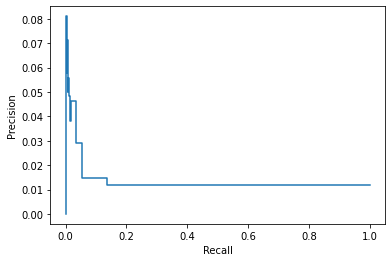

In [31]:
import numpy as np
# precision = np.append(precision, [1])
print(precision)
print(recall)
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

621.4414274692535


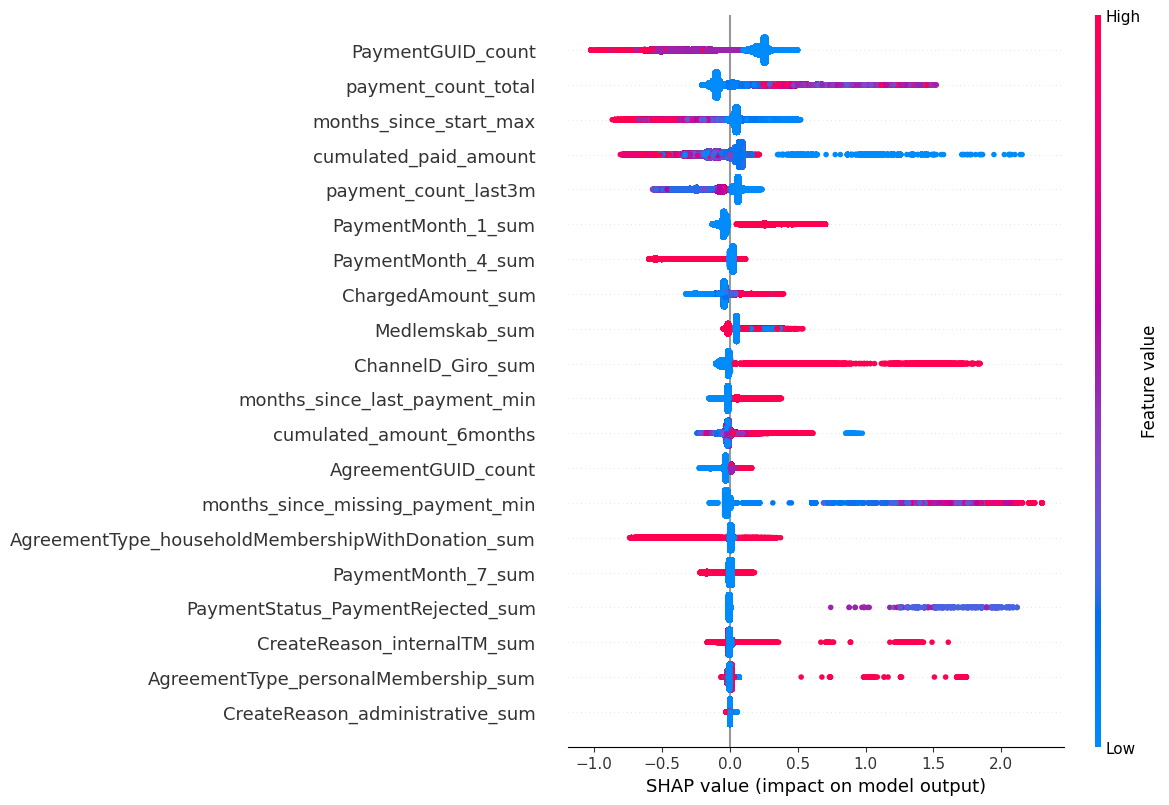

In [32]:
start_time = time.time()

model.model = xgbmodel
model.shap(X_test)

print(time.time() - start_time)

In [33]:
from sail.tmp import shap_private, get_tmp_fns

tmp_fns = get_tmp_fns()

In [34]:
tmp_fns

{'shap_private': '3B3C53AFB1DF415D811E69B32BAB6842',
 'smote': 'A9EB0703F1464698B1A173C5A6911127'}

In [35]:
for vm in vmids:
        for key in tmp_fns:
            pushsafeobj(vm, tmp_fns[key])

In [36]:
X_test[0]

'{7DB4483D-F2B2-49D2-8D98-4EC1B34ADC4F}.0BF4AC222C15496884B65150893F2BBA'

In [37]:
vmids[0]

'{E887AA1C-A0C1-484F-A39D-19B94AE4A8C8}'

In [38]:
xgbmodel

In [39]:
explanation_values, explanation_base_values, expected_value = shap_private(vmids[0], xgbmodel, X_test[0], tmp_fns)

['{83BA9A18-833E-4496-AC9B-A9D89B0CBF6D}']


In [40]:
y_test_df = RemoteDataFrame(vmids[0], y_test[0], fns)
lab = y_test_df.value_counts()
lab

0    862377
1     11419
Name: is_churned_within3m, dtype: int64

In [41]:
temp_index = y_test_df.index

In [42]:
import pandas as pd

customer_guid = []
date = []
for i in range(0, len(temp_index)):
    customer_guid.append(temp_index[i][0])
    date.append(temp_index[i][1])

# Add references to customer instances
df1 = pd.DataFrame()
df1['CustomerGUID'] = customer_guid
df1['Date'] = date

#add predictions
preds = model.predict(X_test)
df1['Predictions'] = preds[0]
df1['SHAP Base Values'] = explanation_base_values

#Add Explanation Values
df2 = pd.DataFrame()
df2 = pd.DataFrame(explanation_values)
df2.columns = cols
results_for_csv = pd.concat([df1, df2], axis=1, join='inner')
results_for_csv.to_csv('./results.csv')
results_for_csv.head()

,CustomerGUID,Date,Predictions,SHAP Base Values,Age_max,ChargedAmount_sum,PostalCode_max,PaidAmount_sum,AgreementGUID_count,PaymentGUID_count,...,PaymentMonth_9_sum,PaymentMonth_10_sum,PaymentMonth_11_sum,PaymentMonth_12_sum,cumulated_paid_amount,cumulated_amount_3months,cumulated_amount_6months,payment_count_last3m,payment_count_last6m,payment_count_total
0,000042c4-ee04-e811-8112-5065f38be571,2020-01-01,-5.391647,-4.370033,0.0,0.093490,0.0,0.0,0.007122,-0.383493,...,0.0,0.0,0.0,0.0,0.024883,0.0,-0.008982,0.025037,0.0,-0.086194
1,000042c4-ee04-e811-8112-5065f38be571,2020-02-01,-4.106607,-4.370033,0.0,-0.038073,0.0,0.0,-0.031105,0.253860,...,0.0,0.0,0.0,0.0,0.069432,0.0,-0.015198,0.061960,0.0,-0.091555
2,000042c4-ee04-e811-8112-5065f38be571,2020-03-01,-5.000599,-4.370033,0.0,-0.048388,0.0,0.0,0.013608,-0.294853,...,0.0,0.0,0.0,0.0,-0.054375,0.0,-0.044358,-0.078710,0.0,-0.035016
3,000042c4-ee04-e811-8112-5065f38be571,2020-04-01,-5.066945,-4.370033,0.0,-0.048320,0.0,0.0,-0.031337,0.167666,...,0.0,0.0,0.0,0.0,-0.074217,0.0,-0.048151,-0.184701,0.0,-0.025593
4,000042c4-ee04-e811-8112-5065f38be571,2020-05-01,-4.646771,-4.370033,0.0,-0.038990,0.0,0.0,-0.036580,0.208567,...,0.0,0.0,0.0,0.0,-0.058505,0.0,-0.054076,-0.305772,0.0,-0.010463


In [43]:
expected_value

-4.370033

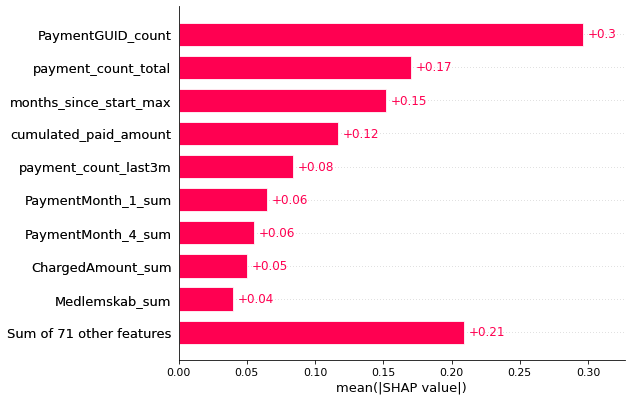

None


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


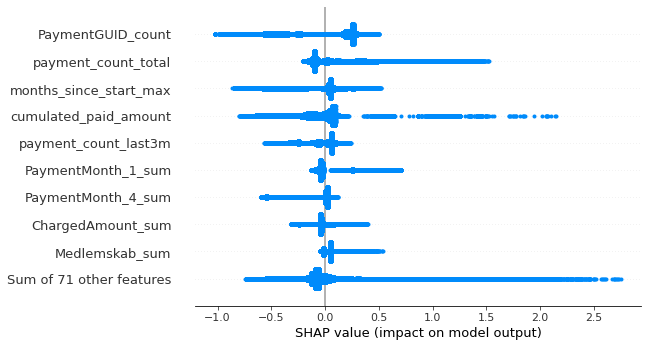

None


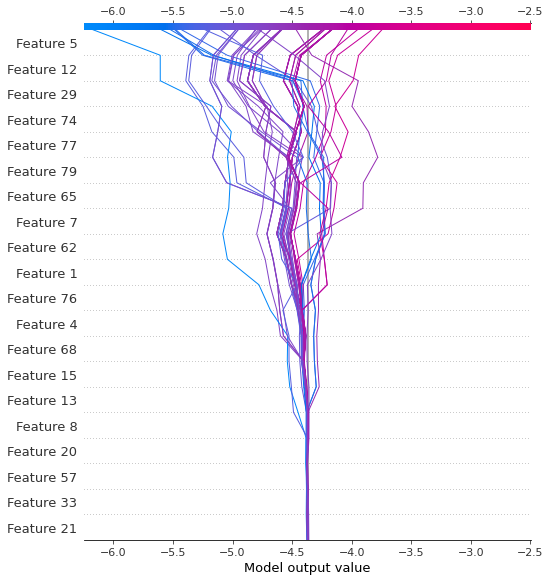

None


In [44]:
import shap

explanation = shap.Explanation(explanation_values, base_values=explanation_base_values, feature_names=cols)
print(shap.plots.bar(explanation))
print(shap.plots.beeswarm(explanation))
# print(shap.decision_plot(expected_value, explanation.values[:50]))
# print(shap.plots._waterfall.waterfall_legacy(expected_value, explanation[0].values))